# 03 - Regularización

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

La regularización ayuda a resolver el problema de sobreajuste en el aprendizaje automático. El modelo simple será una generalización de datos muy pobre. Al mismo tiempo, es posible que el modelo complejo no funcione bien en los datos de prueba debido a un ajuste excesivo. Necesitamos elegir el modelo correcto entre el modelo simple y el complejo. La regularización ayuda a elegir la complejidad del modelo preferido, de modo que el modelo predice mejor. La regularización no es más que agregar un término de penalización a la función objetivo y controlar la complejidad del modelo usando ese término de penalización. Se puede utilizar para muchos algoritmos de aprendizaje automático.

## Parte 1: Sobreajuste

**¿Qué es el sobreajuste?**

- Construir un modelo que coincida con los datos de entrenamiento "demasiado cerca".
- Aprendiendo del error / distorsión / ruido en los datos, en lugar de solo los valores / señal verdaderos.

**¿Cómo se produce el sobreajuste?**

- Evaluar un modelo probándolo con los mismos datos que se utilizaron para entrenarlo.
- Creación de un modelo "demasiado complejo".

**¿Cuál es el impacto del sobreajuste?**

- El modelo funcionará bien en los datos de entrenamiento, pero no se generalizará a datos fuera de la muestra, es decir, prueba
- El modelo tendrá un sesgo bajo, pero una varianza alta.

## Parte 2: Sobreajuste con modelos lineales

**¿Cuáles son las características generales de los modelos lineales?**

- Baja complejidad del modelo
- Alto sesgo, baja varianza
- Generalmente, no tiende a sobreajustarse

siempre existe la posibilidad de **sobreajuste y aún puede ocurrir** con modelos lineales si les permite tener **alta varianza**. <br> Algunas causas comunes son:

### Causa 1: características irrelevantes

Los modelos lineales pueden sobreajustarse si incluyen "características irrelevantes", es decir, características que no están relacionadas con la respuesta. ¿Por qué?

Porque aprenderá un coeficiente para cada característica que incluir en el modelo, independientemente de si esa característica tiene el **impacto** o el **ruido**.

Esto es especialmente un problema cuando **p (número de características) está cerca de n (número de observaciones)**, porque ese modelo naturalmente tendrá una alta varianza.

### Causa 2: características correlacionadas (muticolinealidad)

Los modelos lineales pueden sobreajustarse si las características incluidas están altamente correlacionadas entre sí. ¿Por qué?

Usamos el método OLS (Ordinary Least Squares) (OLS toma algunas suposiciones) [documentación de scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares):

"... las estimaciones de coeficientes para mínimos cuadrados ordinarios se basan en la independencia de los términos del modelo. Cuando los términos están correlacionados y las columnas de la matriz de diseño X tienen una dependencia lineal aproximada, la matriz de diseño se vuelve casi singular y como como resultado, la estimación de mínimos cuadrados se vuelve muy sensible a errores aleatorios en la respuesta observada, produciendo una gran varianza ".

### Causa 3: Coeficientes grandes

Los modelos lineales pueden sobreajustarse si los coeficientes (después de la estandarización de características) son demasiado grandes. ¿Por qué?

Debido a que **mayor** es el valor absoluto del coeficiente, más **potencia** tiene para cambiar la respuesta prevista, lo que da como resultado una varianza más alta.

## Parte 3: Regularización de modelos lineales

- La regularización es un método para "restringir" o "regularizar" el tamaño **de los coeficientes**, y así "reducirlos" a cero.
- Reduce la variación del modelo y, por lo tanto, **minimiza el sobreajuste**.
- Si el modelo es demasiado complejo, tiende a reducir la varianza más de lo que aumenta el sesgo, lo que da como resultado un modelo que tiene **más probabilidades de generalizar**.

Nuestro objetivo es localizar la **complejidad óptima del modelo**, por lo que la regularización es útil cuando creemos que nuestro modelo es demasiado complejo.

![Bias-variance tradeoff](images/bias_variance.png)

### ¿Cómo funciona la regularización?

Para un modelo de regresión lineal normal, estimamos los coeficientes utilizando el criterio de mínimos cuadrados, que **minimiza la suma de cuadrados residual (RSS):**

![Estimating coefficients](images/estimating_coefficients.png)

Para un modelo de regresión lineal regularizado, **minimizamos la suma de RSS y un "término de penalización"** que penaliza el tamaño del coeficiente.

**Ridge regression** (o "regularización L2") minimiza: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (o "regularización L1") minimiza: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ es el **número de características**
- $\beta_j$ es un **coeficiente del modelo**
- $\alpha$ es un **parámetro de ajuste:**
    - Un pequeño $\alpha$ no impone ninguna penalización en el tamaño del coeficiente y es equivalente a un modelo de regresión lineal normal.
    - Incrementar el $\alpha$ penaliza los coeficientes y por lo tanto los reduce.

### Diagramas de ruta de Lasso y Ridge

Un alfa más grande (hacia la izquierda de cada diagrama) da como resultado una mayor regularización:

- **Regresión de Lasso** reduce los coeficientes hasta cero, eliminándolos del modelo
- **Regresión de Ridge** reduce los coeficientes hacia cero, pero rara vez llegan a cero

Código fuente para los diagramas: [Lasso Regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) y [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Path Diagrams](images/lasso_ridge_path.png)

### ¿Cómo elegir entre la regresión de Lasso y la regresión de Ridge? **

- Se prefiere la regresión de Lasso si creemos que muchas características son irrelevantes o si preferimos un modelo disperso.
- Si el rendimiento del modelo es su principal preocupación, es mejor probar ambos.
- La regresión de ElasticNet es una combinación de regresión de Lasso y regresión de ridge.

**¿Deberían estandarizarse las caractrísticas?**

- Sí, porque de lo contrario, las características se penalizarían simplemente por su escala.
- Además, la estandarización evita penalizar la intercepción, lo que no tendría sentido intuitivo.

### Visualizando la regularización

A continuación se muestra una visualización de lo que sucede cuando aplica la regularización. La idea general es que está **restringiendo los valores permitidos de sus coeficientes** a una determinada "región". **Dentro de esa región**, desea encontrar los coeficientes que den como resultado el mejor modelo.

![Lasso and Ridge Coefficient Plots](images/lasso_ridge_coefficients.png)

En este diagrama:

- Estamos ajustando un modelo de regresión lineal con **dos características**, $x_1$ y $x_2$.
- $\hat\beta$ representa el conjunto de dos coeficientes, $\beta_1$ y $\beta_2$, que minimizan el RSS para el **modelo no regular**.
- La regularización restringe las posiciones permitidas de $\hat\beta$ a la **región de restricción azul:**
    - Para Lasso, esta región es un **diamante** porque restringe el valor absoluto de los coeficientes.
    - Para Rifge, esta región es un **círculo** porque restringe el cuadrado de los coeficientes.
- El tamaño **de la región azul** está determinado por $\alpha$, con un $\alpha$ más pequeño resultando en una región más grande:
    - Cuando $\alpha$ es cero, la región azul es infinitamente grande y, por lo tanto, los tamaños de los coeficientes no están restringidos.
    - Cuando aumenta $\alpha$, la región azul se vuelve cada vez más pequeña.

En este caso, $\hat\beta$ **no** está dentro de la región de restricción azul. Por lo tanto, necesitamos **mover $\hat\beta$ hasta que se cruce con la región azul**, mientras que **aumenta el RSS lo menos posible.**

## Parte 4: Regresión regularizada en scikit-learn

- Conjunto de datos de comunidades y delitos del Repositorio de aprendizaje automático de la UCI: [datos](http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data), [diccionario de datos](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)
- **Objetivo:** Predecir la tasa de delitos violentos para una comunidad dados los datos socioeconómicos y de aplicación de la ley

### Cargar y preparar el conjunto de datos sobre delitos

In [1]:
# Importing necessary packages and functions required
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
%matplotlib inline
# for matplotlib graphs to be included in the notebook, next to the code
import seaborn as sns # for visualization
import warnings # to silence warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
# examining the response variable
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

<AxesSubplot:>

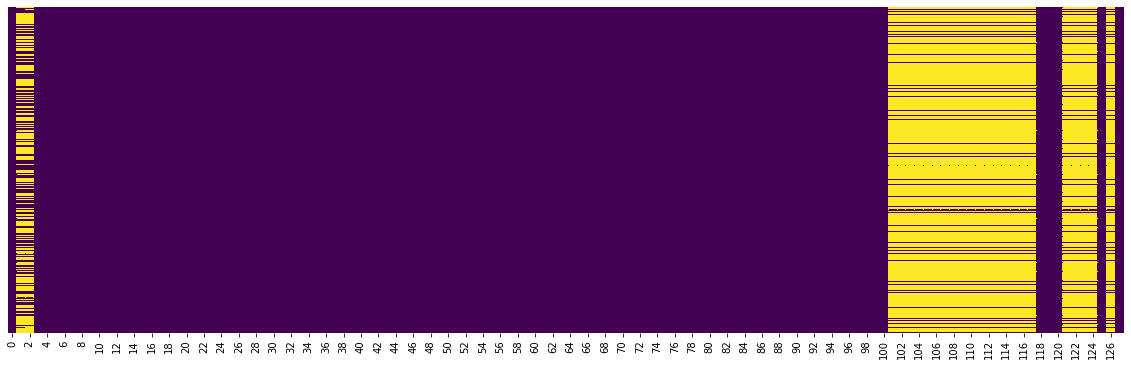

In [4]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [6]:
# remove rows with any missing values
crime.dropna(inplace=True)

<AxesSubplot:>

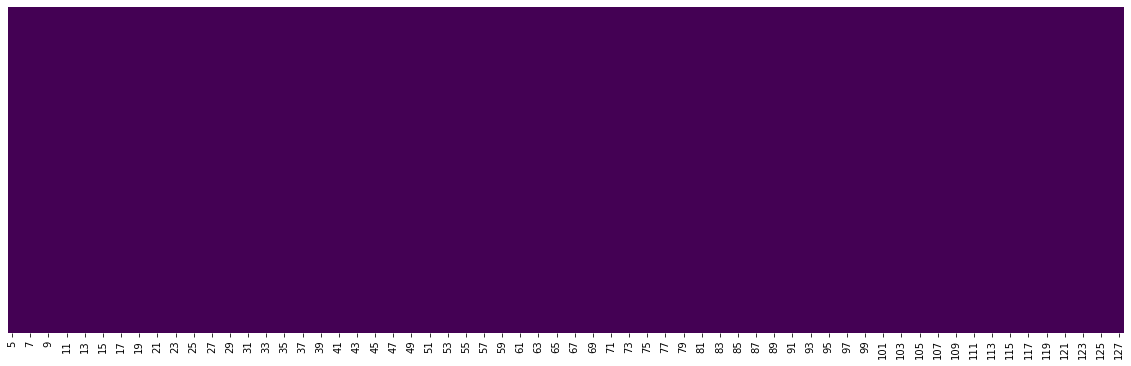

In [7]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# checkng the shape
crime.shape

(319, 123)

In [9]:
# define X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [10]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

### Linear regression

In [11]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
print ("INTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

INTERCEPT :  0.992212528758639
CO-EFFICIENT :  [-3.93018330e+00  7.31324716e-01 -3.01181421e-01 -2.96634778e-01
 -1.83170801e-01  2.81575284e-01 -1.48744636e+00 -4.84695533e-01
  1.24104896e+00 -5.32282788e-01  4.64331123e+00 -1.17079618e-01
  1.04229108e+00  1.36950901e-01 -3.12434116e-01 -1.16489196e+00
  5.37252913e-01  7.49655606e-01 -8.02500871e-02  8.42449509e-01
 -1.98951720e-01 -3.17193999e-01 -4.31217869e-01  1.19357660e-01
 -1.83148129e-01  2.11602690e-01 -1.57441950e-01 -1.03051105e+00
  1.49628176e+00  1.86093900e-01 -1.12289917e+00 -1.13107576e-02
  1.22670519e-01  1.46348876e-01 -1.64172731e-01 -3.73690589e-02
  1.92733806e-01  4.34808503e-01  2.32870361e+00 -5.15176228e-01
  2.64683754e+00 -5.48075999e+00  9.63873430e-01 -1.15021921e+00
 -1.15575665e+00  1.10543276e+00  2.41469970e-01 -6.32209680e-01
  6.01741978e-01  8.37645340e-02  1.05006759e-01 -2.58807800e-01
  5.31513493e-01 -8.57090632e-01 -3.29684470e-01  6.61114510e-01
 -5.61884511e-01  6.27806334e-01  2.7984800

In [13]:
# make predictions
y_pred = linreg.predict(X_test)

In [16]:
# predictions train
y_pred_train = linreg.predict(X_train)
r2_score(y_train, y_pred_train)

0.8752096141514378

In [14]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295409856


mean_absolute_error : 0.1672515582488828


mean_squared_error :  0.04986345422693358


root_mean_squared_error :  0.22330126337961811


MSE es más popular que MAE porque MSE "elimina" errores mayores. Pero RMSE es incluso mejor que MSE porque RMSE se puede interpretar en las unidades "y".

### Ridge regression

- Documentación de [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- **alpha:** debe ser positivo, aumentar para una mayor regularización
- **normalizar:** escala las características (sin usar StandardScaler)

In [17]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.197044562957847


mean_absolute_error : 0.1672515582482433


mean_squared_error :  0.0498634542267008


root_mean_squared_error :  0.2233012633790969


In [18]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5347697501566352


mean_absolute_error : 0.12769772972161875


mean_squared_error :  0.028890753082631365


root_mean_squared_error :  0.16997280100837123


In [19]:
# examing the coefficients
print(ridgereg.coef_)

[-5.77226675e-03  2.26721774e-02  4.98857382e-02 -6.70174168e-02
 -1.83566112e-02  5.26888536e-02  1.17689929e-02 -5.72468914e-02
  1.52761058e-03  4.29131248e-02  1.04586550e-04 -1.85621890e-02
  5.07008262e-02 -9.63941391e-02 -1.58499805e-01 -3.28082329e-01
 -1.43015949e-02  8.97253556e-02 -1.10520025e-01  8.02961453e-02
 -2.01498712e-02  7.77242382e-03 -8.07823610e-02 -1.39148634e-01
 -1.19008810e-02  1.00148033e-01  3.61850806e-02 -9.71628046e-02
  6.94268658e-02 -8.81688130e-02 -9.79415666e-02 -4.99145470e-03
  1.28541873e-01 -4.15102106e-02 -1.35952164e-01  4.09752240e-02
  7.00727085e-02 -1.86859042e-02  5.95401646e-02  6.28621417e-02
 -3.91478791e-02  8.48551263e-03  7.31545217e-02 -1.28265573e-01
 -1.22240655e-01 -7.02441332e-02 -7.10900893e-02 -6.33671556e-02
  1.01095274e-01 -5.22454503e-02  1.15465301e-01 -7.35016006e-02
 -4.79847841e-03 -1.10878367e-01  6.49567154e-02  4.12339751e-02
 -1.06606017e-02  1.32494298e-03  1.81063822e-02 -1.85567810e-03
 -1.32904914e-02  3.94493

- [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html): ridge regression con validación cruzada incorporada del parámetro alfa (LO VEREMOS EN UN SIGUIENTE NOTEBOOK)
- **alfas:** matriz de valores alfa para probar

In [20]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [23]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='r2')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [24]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5318623469518302


mean_absolute_error : 0.13256644483823612


mean_squared_error :  0.029071302537723664


root_mean_squared_error :  0.17050308659295194


### Lasso regression

- Documentación de [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- **alpha:** debe ser positivo, aumentar para una mayor regularización
- **normalizar:** escala las características (sin usar StandardScaler)

In [25]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.25339884  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.17865705  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.02230294
 -0.          0.          0.          0.          0.0998841  -0.
  0.         -0.          0.01893786 -0.         -0.03169217  0.
  0.         -0.          0.11479343  0.          0.          0.
  0.         -0.16845012 -0.27294066 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.02709397 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.00233805
  0.15404

In [26]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.04214088  0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.29715868 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         

In [27]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.3241322659149898


mean_absolute_error : 0.16889755277533727


mean_squared_error :  0.04197132028397072


root_mean_squared_error :  0.20486903202770965


- [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html): Lasso regression con validación cruzada incorporada del parámetro alfa
- **n_ alfas:** número de valores alfa (elegidos automáticamente) para probar

In [28]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.0016878682947072093


In [29]:
# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.26320105  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.1285917   0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.11511909  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.04667596  0.          0.          0.08875875
  0.         -0.09735466 -0.3276063  -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.14776487  0. 

In [30]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5506049113488305


mean_absolute_error : 0.13416628182873494


mean_squared_error :  0.0279073911189985


root_mean_squared_error :  0.16705505415580368


# Comparación de modelos lineales regularizados con modelos lineales no regularizados

**Ventajas de los modelos lineales regularizados sobre los lineales:**

- Mejor performance
- La regularización L1 realiza la selección automática de características
- Útil para problemas de alta dimensión (p > n)

**Desventajas de los modelos lineales regularizados sobre los lineales:**

- Se requiere afinación (tunning).
- Se recomienda el escalado de variables.
- Menos interpretable (debido a la escala de características).